Standard Error: 0.09912514837519708
Bias: 0.006492592783842052
Coefficient of Variation: 0.06549894643554065
Original Theta Estimate: -0.07130609590256017


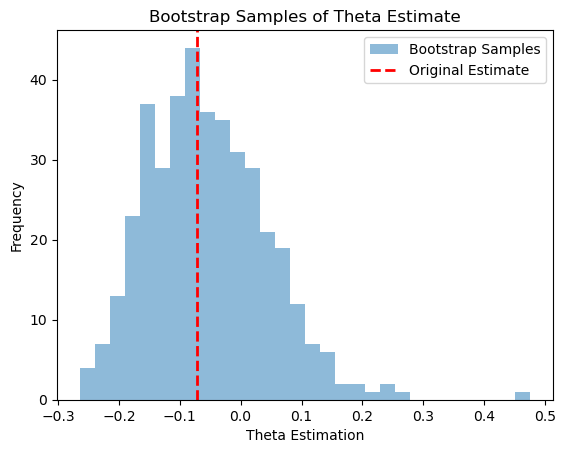

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.array([ 8406, 2342, 8187, 8459, 4795, 3516, 4796, 10238 ])
Y = np.array([ -1200, 2601, -2705, 1982, -1290, 351, -638, -2719 ])

B = 400
N = len(Z)  # size of your arrays Z and Y

theta_est = np.mean(Y) / np.mean(Z)

bootstrap_samples = []
resampling_vectors = []

indices = np.arange(N)  # generate an array of indices from 0 to N-1

for _ in range(B):
    bootstrap_indices = np.random.choice(indices, size=N)  # bootstrap sampling of indices
    sample_Z = Z[bootstrap_indices]  # get corresponding values from Z
    sample_Y = Y[bootstrap_indices]  # get corresponding values from Y

    bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
    bootstrap_samples.append(bootstrap_theta_est)

    # Compute the resampling vector
    resampling_vector = [np.count_nonzero(bootstrap_indices == i) for i in indices]
    resampling_vector = np.array(resampling_vector) / N
    resampling_vectors.append(resampling_vector)

bootstrap_samples = np.array(bootstrap_samples)
resampling_vectors = np.array(resampling_vectors)  # convert list of arrays into 2D array

# Calculate the mean resampling vector
mean_resample_vec = np.mean(resampling_vectors, axis=0)

# calculate the standard error
se = np.std(bootstrap_samples, ddof=1)
print("Standard Error:", se)

# calculate the bias using mean of resampling vector
theta_star = np.average(Y, weights=mean_resample_vec) / np.average(Z, weights=mean_resample_vec)
bias = np.mean(bootstrap_samples) - theta_star
print("Bias:", bias)

# calculate the coefficient of variation
cv = bias / se
print("Coefficient of Variation:", cv)

# print original theta_est
print("Original Theta Estimate:", theta_est)

# plot histogram
plt.hist(bootstrap_samples, bins=30, alpha=0.5, label='Bootstrap Samples')
plt.axvline(theta_est, color='r', linestyle='dashed', linewidth=2, label='Original Estimate')
plt.xlabel('Theta Estimation')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Bootstrap Samples of Theta Estimate')
plt.show()
